In [109]:
__author__ = "me"
__date__ = "2015_10_13"
%pylab inline
import pandas as pd
# import numpy as np
# import geopandas as gp

from sklearn.linear_model import LinearRegression
import pylab as plt
import os

import requests
s = requests.get("https://raw.githubusercontent.com/Casyfill/CUSP_templates/master/Py/fbMatplotlibrc.json").json()
plt.rcParams.update(s)


PWD = os.getenv('PWD')

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [41]:
cols = ['genCategory','category','name','lon','lat','checkIns','tips','users','createdAt','tileID','ID','query','time','verified','price','rating','tags','photoCount','description']

In [107]:
tokyo_path = "/Users/casy/Dropbox/CUSP/project/Square_cities/data/Tokyo_all.csv"
singapor_path = '/Users/casy/Dropbox/CUSP/project/Square_cities/data/Singapur_all.csv'
moscow_path = '/Users/casy/Dropbox/CUSP/project/Square_cities/data/Mosco_all.csv'

In [108]:
tokyo = pd.read_csv(tokyo_path, index_col=0, encoding='utf8')[cols]
singapor = pd.read_csv(singapor_path, index_col=0, encoding='utf8')[cols]
moscow = pd.read_csv(moscow_path, index_col=0, encoding='utf8')[cols]

In [44]:
tokyo.head(2)

,genCategory,category,name,lon,lat,checkIns,tips,users,createdAt,tileID,ID,query,time,verified,price,rating,tags,photoCount,description
0,Travel & Transport,Train Station,蘇我駅 (Soga Sta.),140.130948,35.581655,53976,13,7675,2010.01.16,0_01,4b5163cef964a5204f4c27e3,A_Tokyo,2015.11.09 19:24:59,False,-1,8.6,jr;keiyō line;sotobō line;uchobō line;京葉線;内房線;外房線,492,NaN
1,Travel & Transport,Rest Area,海ほたるPA,139.874389,35.464384,26203,30,17004,2010.07.04,0_01,4c30482a452620a123f81e0f,A_Tokyo,2015.11.09 19:24:59,False,-1,7.8,bridge;dr pepper;food court;parking;umihotaru;...,1349,NaN


-----------

# Aggregating by category

In [76]:
def aggData(df):
    cats = df[['genCategory','category','checkIns','tips','users','photoCount']].groupby('category').agg({'genCategory':lambda x: x.iloc[0],
                                                                                                              "checkIns":sum,
                                                                                                              'tips':sum, 
                                                                                                              'users':sum,
                                                                                                              'photoCount':sum})
    return cats.reset_index()

In [77]:
tokyo_cat = aggData(tokyo)
tokyo_cat.head(5)

,category,tips,photoCount,checkIns,genCategory,users
0,ATM,7,40,3122,Shop & Service,659
1,Acai House,4,95,441,Food,210
2,Accessories Store,71,1038,9602,Shop & Service,5781
3,Acupuncturist,16,22,1193,Professional & Other Places,147
4,Adult Boutique,18,109,5622,Shop & Service,2282


## PLOTTING

In [102]:
def getLinears(df):
    '''return linear model'''
    lm = LinearRegression()
    X = np.reshape(df.checkIns, (len(df),1))
    y = np.reshape(df.users, (len(df),1))
    lm.fit(X,y), X
    return lm, X

In [100]:
def annotate_plot(frame, label_col, plot_col1,plot_col2, **kwargs):
    for label, x, y in zip(frame[label_col], frame[plot_col1], frame[plot_col2]):
        plt.annotate(label, xy=(x, y), **kwargs)

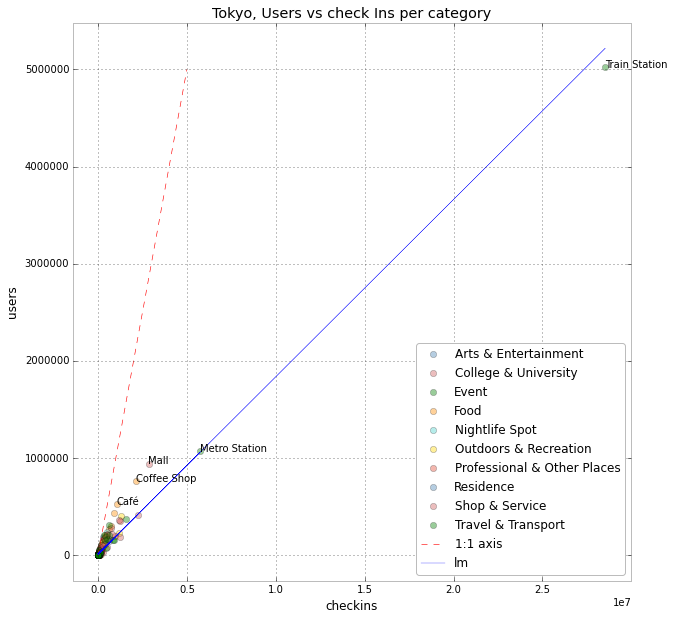

In [112]:
myLm, X = getLinears(tokyo_cat)
groups = tokyo_cat.groupby('genCategory')

fig, ax = plt.subplots(figsize=(10,10))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling


for name, group in groups:
    ax.plot(group.checkIns, group.users, marker='o',  linestyle='', ms=6, alpha=.4, label=name)
    annotate_plot(group[group.users >500000], 'category', 'checkIns', 'users')

ax.plot((0,5000000), (0,5000000), color='r', linestyle='--', linewidth=.6,  label='1:1 axis')
ax.plot(X, myLm.predict(X), color='blue',linestyle='-', linewidth=.3, label='lm') 

plt.ylabel('users')    
plt.xlabel('checkins')    
plt.title('Tokyo, Users vs check Ins per category')
ax.legend(numpoints=1,loc='best');
plt.savefig(PWD + '/img/Tokyo_cat_sctplt.png')

In [86]:
def plotLog(df, dfname):
    groups = df.groupby('genCategory')

    fig, ax = plt.subplots(figsize=(10,10))
    ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling


    for name, group in groups:
        ax.plot(np.log10(group.checkIns), np.log10(group.users), marker='o',  linestyle='', ms=6, alpha=.4, label=name)
    #     annotate_plot(group[group.users >500000], 'category', 'checkIns', 'users')

    ax.plot((0,7), (0,7), color='r', linestyle='--', linewidth=.6,  label='1:1 axis') ## equality axis
    plt.ylabel('users, log')    
    plt.xlabel('checkins, log')    
    plt.title('%s, Users vs check Ins per category, log'% dfname)
    ax.legend(numpoints=1,loc='best');
    plt.savefig(PWD + '/img/%s_cat_sctplt_lat.png' % dfname)


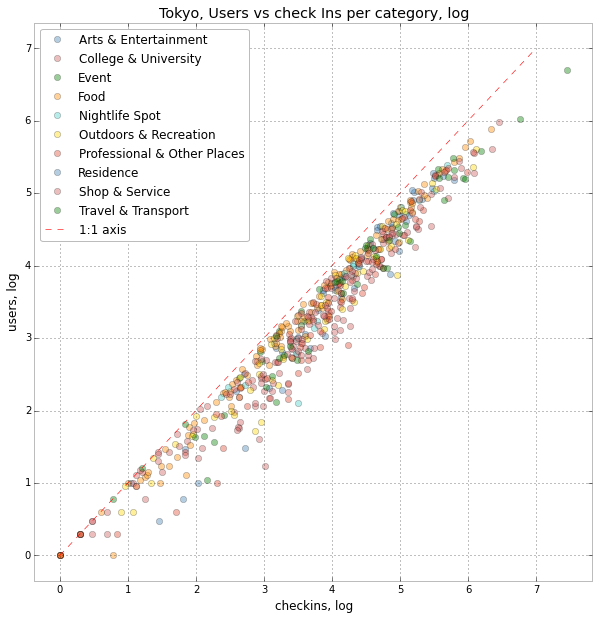

In [87]:
plotLog(tokyo_cat, 'Tokyo')

In [81]:
sing_cat = aggData(singapor)

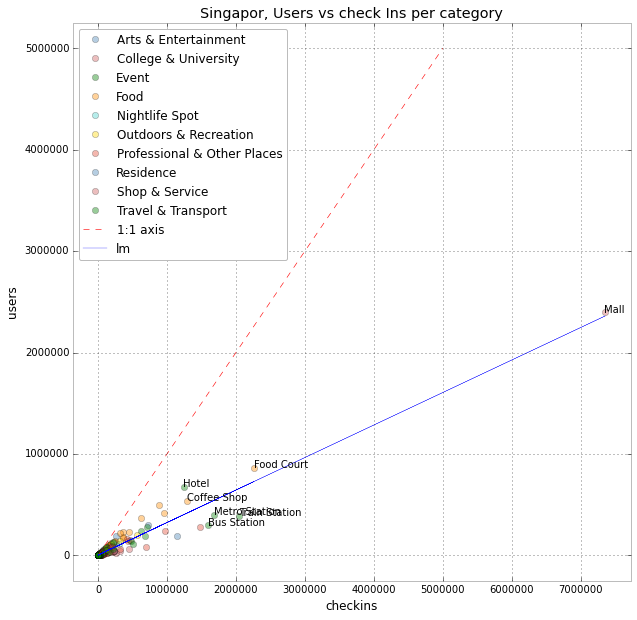

In [106]:
myLm, X = getLinears(sing_cat)
groups = sing_cat.groupby('genCategory')

fig, ax = plt.subplots(figsize=(10,10))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling


for name, group in groups:
    ax.plot(group.checkIns, group.users, marker='o',  linestyle='', ms=6, alpha=.4, label=name)
    annotate_plot(group[(group.users >500000) | (group.checkIns >1500000)], 'category', 'checkIns', 'users')

ax.plot((0,5000000), (0,5000000), color='r', linestyle='--', linewidth=.6,  label='1:1 axis')
ax.plot(X, myLm.predict(X), color='blue',linestyle='-', linewidth=.3, label='lm') 
plt.ylabel('users')    
plt.xlabel('checkins')    
    
plt.title('Singapor, Users vs check Ins per category')
ax.legend(numpoints=1,loc='best');
plt.savefig(PWD + '/img/singapor_cat_sctplt.png')

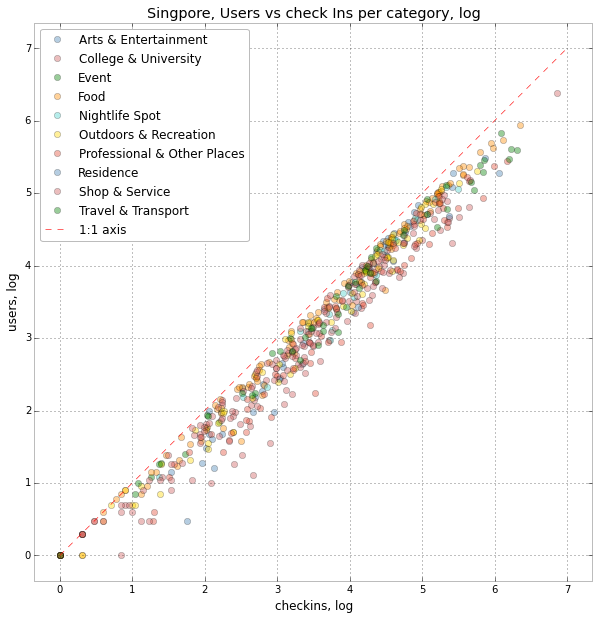

In [88]:
plotLog(sing_cat, 'Singpore')

In [110]:
moscow_cat = aggData(moscow)

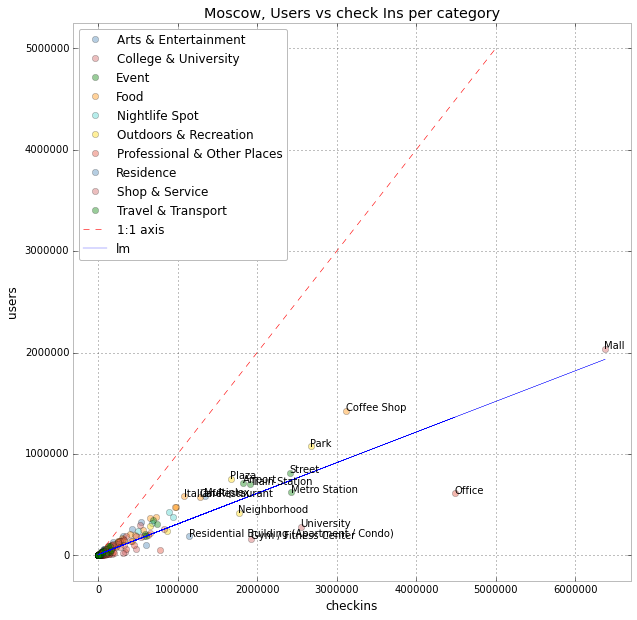

In [115]:
myLm, X = getLinears(moscow_cat)
groups = moscow_cat.groupby('genCategory')

fig, ax = plt.subplots(figsize=(10,10))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling


for name, group in groups:
    ax.plot(group.checkIns, group.users, marker='o',  linestyle='', ms=6, alpha=.4, label=name)
    annotate_plot(group[(group.users >500000) | (group.checkIns > 1000000)], 'category', 'checkIns', 'users')

ax.plot((0,5000000), (0,5000000), color='r', linestyle='--', linewidth=.6,  label='1:1 axis')
ax.plot(X, myLm.predict(X), color='blue',linestyle='-', linewidth=.3, label='lm') 

plt.ylabel('users')    
plt.xlabel('checkins')    
plt.title('Moscow, Users vs check Ins per category')
ax.legend(numpoints=1,loc='best');
plt.savefig(PWD + '/img/Moscow_cat_sctplt.png')

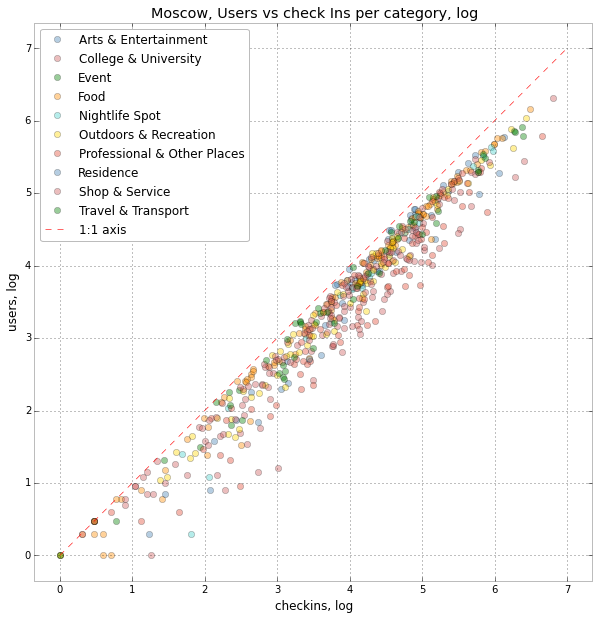

In [116]:
plotLog(moscow_cat, 'Moscow')

In [117]:
sf_path = '/Users/casy/Dropbox/CUSP/project/Square_cities/data/San_Francisco_all.csv' 
sf = pd.read_csv(sf_path, index_col=0, encoding='utf8')[cols]
sf_cat = aggData(sf)

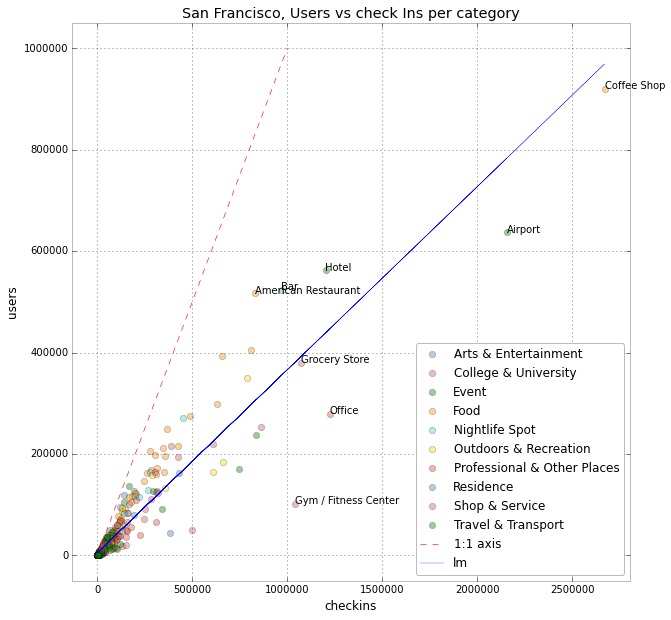

In [121]:
myLm, X = getLinears(sf_cat)
groups = sf_cat.groupby('genCategory')

fig, ax = plt.subplots(figsize=(10,10))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling


for name, group in groups:
    ax.plot(group.checkIns, group.users, marker='o',  linestyle='', ms=6, alpha=.4, label=name)
    annotate_plot(group[(group.users >500000) | (group.checkIns > 1000000)], 'category', 'checkIns', 'users')

ax.plot((0,1000000), (0,1000000), color='r', linestyle='--', linewidth=.6,  label='1:1 axis')
ax.plot(X, myLm.predict(X), color='blue',linestyle='-', linewidth=.3, label='lm') 

plt.ylabel('users')    
plt.xlabel('checkins')    
plt.title('San Francisco, Users vs check Ins per category')
ax.legend(numpoints=1,loc='best');
plt.savefig(PWD + '/img/San_Francisco_cat_sctplt.png')

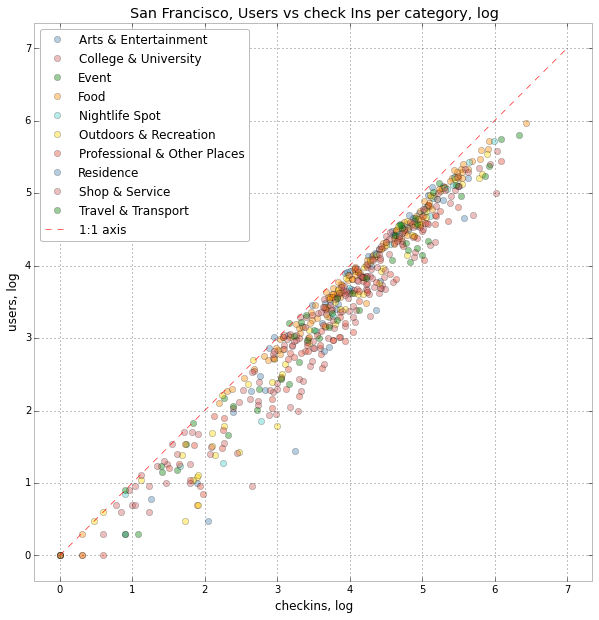

In [122]:
plotLog(sf_cat, 'San Francisco')

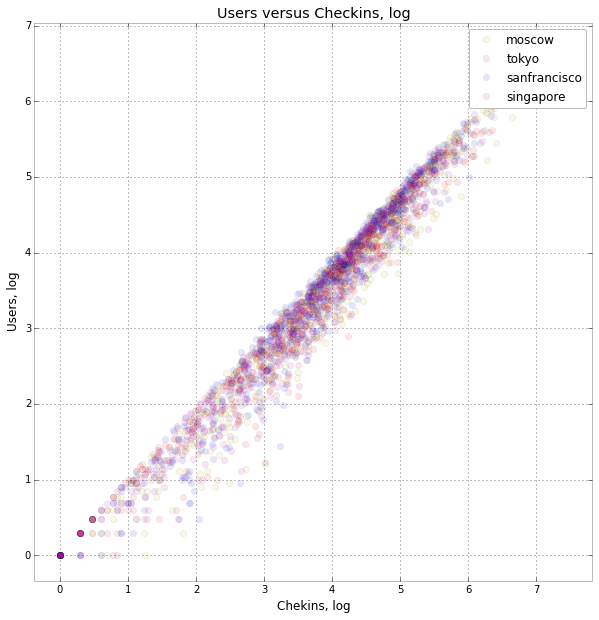

In [140]:
fig, ax = plt.subplots(figsize=(10,10))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

colors =  {'sanfrancisco':'b', 'moscow':'y','singapore':'m', 'tokyo':"r"}

for name, group in {'sanfrancisco':sf_cat, 'moscow':moscow_cat,'singapore':sing_cat, 'tokyo':tokyo_cat}.iteritems():
    ax.plot(np.log10(group.checkIns), np.log10(group.users), marker='o', linestyle='', color=colors[name] ,ms=6, alpha=.1, label=name )


# for name, group in {'sanfrancisco':sf_cat, 'moscow':moscow_cat,'singapore':sing_cat, 'tokyo':tokyo_cat}.iteritems():
#     ax.plot(group.checkIns, group.users, marker='o', linestyle='', color=colors[name] ,ms=6, alpha=.6, label=name )


ax.set_ylabel('Users, log')
ax.set_xlabel('Chekins, log')
ax.set_title('Users versus Checkins, log')

ax.legend(numpoints=1);
plt.savefig(PWD + '/img/all_cat_sctplt_log.png')